In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Original Image')

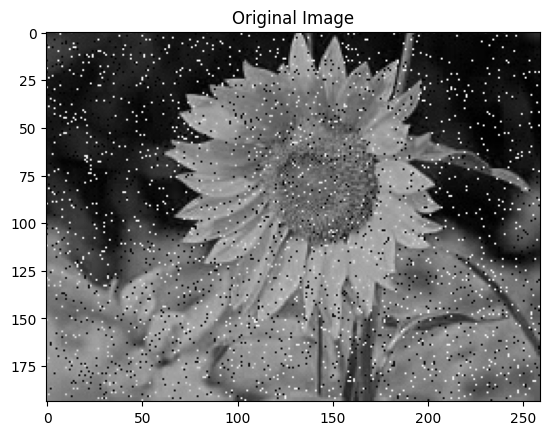

In [14]:
image = plt.imread("bunga.jpg")
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")
plt.title("Original Image")

## Konvolusi

In [15]:
def getPadding (image, kernel):
    # mendapatkan titik tengah dari kernel
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2
    # menghitung lapisan dari padding yang nanti akan digunakan
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j

    result = np.pad(image,((atas,bawah),(kiri,kanan)), 'constant', constant_values=0)
    return result

In [16]:
def konvolusi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    # mendapatkan padding zero secara dinamis dengan menggunakan titik tengah dari kernel
    imgPad = getPadding(image,kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum += imgPad[i+k][j+l] * kernel[k, l]
            result[i, j] = sum
    return result

## MEAN

In [17]:
def meanFilter (image, lebarKernel, tinggiKernel):
    # membuat secara otomatis matriks persegi dengan ukurang yang kita inginkan dan semua nilai nya 1/besarkernel pangkat dua
    # untuk mendapatkan rata rata, misalkan array 3x3 maka 1/9, jika 5x5 maka 1/25, semakin besar kernelnya maka semakin blur hasil gambar
    kernel = np.full((lebarKernel, tinggiKernel), 1/(lebarKernel*tinggiKernel))
    result = konvolusi(image, kernel)
    return result

Text(0.5, 1.0, 'Mean Filtering 7x7')

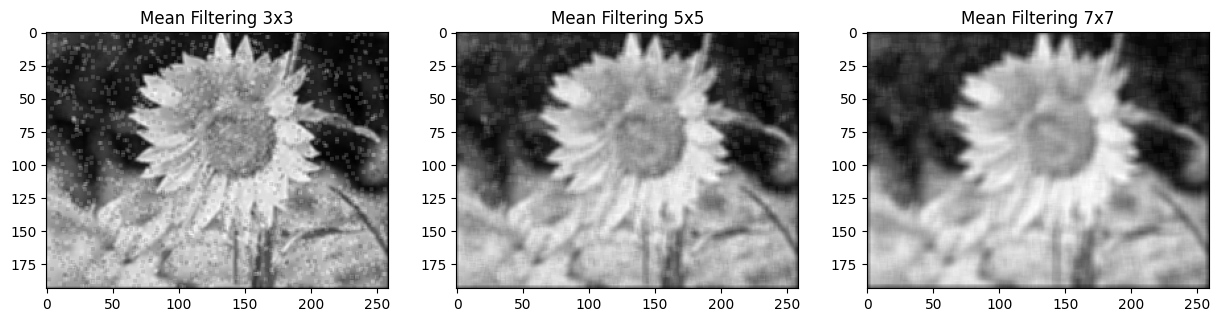

In [18]:
mean3x3 = meanFilter(image,3,3)
mean5x5 = meanFilter(image,5,5)
mean7x7 = meanFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(mean3x3, cmap="gray")
ax[0].set_title('Mean Filtering 3x3')
ax[1].imshow(mean5x5, cmap="gray")
ax[1].set_title('Mean Filtering 5x5')
ax[2].imshow(mean7x7, cmap="gray")
ax[2].set_title('Mean Filtering 7x7')